# Mínimos Cuadrados y Bitcoin

Laura Suárez

#### Predicción precio del bitcoin

Para iniciar se usará un histórico de datos del precio del bitcoin en el último mes. Estos fueron obtenidos de https://es-us.finanzas.yahoo.com/quote/BTC-USD/history/.

In [1]:
using CSV
using DataFrames

Bitcoin = CSV.read("E:\\PERSONAL\\Desktop\\datos\\BTC-USD.csv",DataFrame) # lectura de archivo con datos del bitcoin.

,Date,Open,High,Low,Close,Adj Close,Volume
,Date,Float64,Float64,Float64,Float64,Float64,Int64
1,2022-02-18,40552.1,40929.2,39637.6,40031.0,40031.0,23310007704
2,2022-02-19,40026.0,40418.9,39713.1,40122.2,40122.2,13736557863
3,2022-02-20,40118.1,40119.9,38112.8,38431.4,38431.4,18340576452
4,2022-02-21,38423.2,39394.4,36950.5,37075.3,37075.3,29280402798
5,2022-02-22,37068.8,38359.9,36488.9,38286.0,38286.0,25493150450
6,2022-02-23,38285.3,39122.4,37201.8,37296.6,37296.6,21849073843
7,2022-02-24,37278.6,38968.8,34459.2,38332.6,38332.6,46383802093
8,2022-02-25,38333.7,39630.3,38111.3,39214.2,39214.2,26545599159
9,2022-02-26,39213.1,40005.3,38702.5,39105.1,39105.1,17467554129


In [2]:
pb = Bitcoin[!,:Close]; # Se extrae la columna "Close" y se convierte en vector.

Se aproximan los datos anteriores mediante un polinomio, como sigue. Primero se crea la matriz de datos.

In [3]:
N = size(pb,1);
x=Array(1:N);

A=zeros(N,6);
for i=1:6
    A[:,i]=x.^(i-1) # Cada columna de la matriz es una potencia del vector x.
end

Se da una solución a la ecuación $Ax=pb$ valiéndose de procesos incorporados de Julia.

In [4]:
s=A\pb

6-element Vector{Float64}:
 44771.104594971446
 -4478.675634634251
   897.1942321761712
   -68.60670272491176
     2.2275664753455384
    -0.025839147291323514

De acuerdo a la solución $s$ obtenida, el polinomio con el se va a aproximar la función es el siguiente. 

$$p(x)=44771.10-4478.67x+897.19x^2-68.60x^3+2.22x^4-0.025x^5.$$

Para observar el comportamiento del polinomio de aproximación frente al precio real, se realiza el respectivo gráfico.

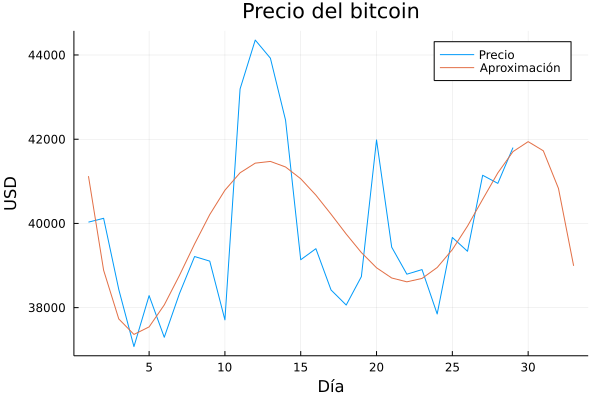

In [12]:
using Plots

function p(a)
    s[1]+s[2]a+s[3]a^2+s[4]a^3+s[5]a^4+s[6]a^5
end

y=Array(1:33);
plot(pb, title="Precio del bitcoin", label="Precio", xlabel="Día", ylabel="USD")
plot!(y,p, label="Aproximación")

Los primeros valores que predice el polinomio se muestran en el siguiente vector.

In [13]:
pred=[p(30) p(31) p(32) p(33)];
print(pred)

[41942.23679260514 41725.105527809355 40830.77687239065 38992.92964416288]

##### Diferencia con mínimos cuadrados

Al considerar la diferencia con mínimos cuadrados entre el polinomio de aproximación y el precio, $\|Ax-pb\|_2^2=(Ax-pb)^T(Ax-pb)$, se tiene:

In [8]:
function d(x1,x2,x3,x4,x5,x6)
    transpose(A[:,1]*x1+A[:,2]*x2+A[:,3]*x3+A[:,4]*x4+A[:,5]*x5+A[:,6]*x6-pb)*(A[:,1]*x1+A[:,2]*x2+A[:,3]*x3+A[:,4]*x4+A[:,5]*x5+A[:,6]*x6-pb)
end

dif=d(s[1],s[2],s[3],s[4],s[5],s[6])

5.8765694053994e7

Tras procesos análogos realizados para obtener polinomios aproximados de grados 3, 4 y 6, y al hacer los cálculos de la diferencia con mínimos cuadrados entre el precio del bitcoin y los respectivos polinomios, se obtuvieron los siguientes resultados.

| Grado del polinomio | Diferencia | 
| :-: | :-: |
| 3 | 9.63022540323387e7 | 
| 4 | 6.968092085147448e7 |
| 6 | 5.836597251160366e7 |

</b></b>
<div style="text-align: justify"> Se observa que a medida que aumenta el grado del polinomio, disminuye su diferencia con el precio; sin embargo, la disminución que se obtiene entre un grado y el otro es cada vez menor. Además, al tomar un polinomio de grdo mayor, en la creación de las potencias del vector (matriz $A$ en este caso), se corre el riesgo de obtener una matriz mal condicionada, lo cual no es recomendable. Por tales razones, se seleccionó el polinomio de grado 5 para realizar la aproximación.</div>

#### Bitcoin y otras comodities

Para comenzar, se usará un historico de las respectivas comodities.

In [47]:
oro = CSV.read("E:\\PERSONAL\\Desktop\\datos\\oro2.csv",DataFrame); # lectura de archivo con datos del oro.
o2=oro[:,[:Fecha,:Último]]

,Fecha,Último
,String15,Int64
1,18.03.2022,1929
2,17.03.2022,1943
3,16.03.2022,1909
4,15.03.2022,1930
5,14.03.2022,1961
6,11.03.2022,1985
7,10.03.2022,2000
8,09.03.2022,1988
9,08.03.2022,2043


In [45]:
petr = CSV.read("E:\\PERSONAL\\Desktop\\datos\\pet.csv",DataFrame); # lectura de archivo con datos del petroleo.
p2=petr[:,[:Fecha,:Último]]

,Fecha,Último
,String15,Float64
1,18.03.2022,104.7
2,17.03.2022,102.98
3,16.03.2022,95.04
4,15.03.2022,96.44
5,14.03.2022,103.01
6,11.03.2022,109.33
7,10.03.2022,106.02
8,09.03.2022,108.7
9,08.03.2022,123.7


In [42]:
sil = CSV.read("E:\\PERSONAL\\Desktop\\datos\\silver.csv",DataFrame); # lectura de archivo con datos de la plata.
s2=sil[:,[:Fecha,:Último]]

,Fecha,Último
,String15,Float64
1,18.03.2022,25.09
2,17.03.2022,25.62
3,16.03.2022,24.71
4,15.03.2022,25.16
5,14.03.2022,25.3
6,13.03.2022,25.9
7,11.03.2022,26.16
8,10.03.2022,26.26
9,09.03.2022,25.82


In [50]:
btc = CSV.read("E:\\PERSONAL\\Desktop\\datos\\btc1.csv",DataFrame); # lectura de archivo con datos del bitcoin.
b2=btc[:,[:Fecha,:Último,:Día]]

,Fecha,Último,Día
,String15,Float64,Int64
1,18.03.2022,41774.0,366
2,17.03.2022,40942.6,365
3,16.03.2022,41148.0,364
4,15.03.2022,39317.0,363
5,14.03.2022,39717.0,362
6,13.03.2022,37777.1,361
7,12.03.2022,38816.3,360
8,11.03.2022,38737.0,359
9,10.03.2022,39458.5,358


Como no todas las comodities tienen la misma cantidad de datos ni corresponden a las mismas fechas, se seleccionarán solo aquellos con datos comunes.

In [51]:
c=innerjoin(o2,p2,s2,b2, on=:Fecha,makeunique=true)

,Fecha,Último,Último_1,Último_2,Último_3,Día
,String15,Int64,Float64,Float64,Float64,Int64
1,18.03.2022,1929,104.7,25.09,41774.0,366
2,17.03.2022,1943,102.98,25.62,40942.6,365
3,16.03.2022,1909,95.04,24.71,41148.0,364
4,15.03.2022,1930,96.44,25.16,39317.0,363
5,14.03.2022,1961,103.01,25.3,39717.0,362
6,11.03.2022,1985,109.33,26.16,38737.0,359
7,10.03.2022,2000,106.02,26.26,39458.5,358
8,09.03.2022,1988,108.7,25.82,41962.3,357
9,08.03.2022,2043,123.7,26.9,38757.0,356


Se consideran las columnas que formarán parte de la matriz.

In [53]:
O,P,S,D=c.Último,c.Último_1,c.Último_2,c.Día;
M=[O P S D]

264×4 Matrix{Float64}:
 1929.0  104.7   25.09  366.0
 1943.0  102.98  25.62  365.0
 1909.0   95.04  24.71  364.0
 1930.0   96.44  25.16  363.0
 1961.0  103.01  25.3   362.0
 1985.0  109.33  26.16  359.0
 2000.0  106.02  26.26  358.0
 1988.0  108.7   25.82  357.0
 2043.0  123.7   26.9   356.0
 1996.0  119.4   25.72  355.0
 1967.0  115.68  25.79  352.0
 1936.0  107.67  25.21  351.0
 1922.0  110.6   25.19  350.0
    ⋮                   
 1738.0   58.65  24.86   19.0
 1737.0   61.45  25.02   15.0
 1724.0   59.16  24.61   14.0
 1694.0   60.55  24.21   13.0
 1723.0   61.56  24.84   12.0
 1743.0   60.97  25.18    9.0
 1736.0   58.56  25.11    8.0
 1744.0   61.18  25.3     7.0
 1737.0   57.76  25.29    6.0
 1749.0   61.55  25.82    5.0
 1753.0   61.42  26.37    2.0
 1744.0   60.0   26.4     1.0

In [54]:
b=c.Último_3 # vector de precios.

264-element Vector{Float64}:
 41774.0
 40942.6
 41148.0
 39317.0
 39717.0
 38737.0
 39458.5
 41962.3
 38757.0
 38039.0
 39171.0
 42490.0
 43952.0
     ⋮
 59145.0
 58727.4
 58796.0
 58841.0
 57672.3
 54992.9
 51363.0
 52347.2
 54331.0
 54074.0
 58074.0
 57640.0

Se obtiene el vector solución.

In [55]:
sol=M\b

4-element Vector{Float64}:
   104.41574514351966
    63.51538730350836
 -5335.587588430063
   -88.27932037693989

Por lo anterior, la ecuación que seguiría el precio del bitcoin teniendo en cuenta oro, petróleo, plata y tiempo es
$$o*104.4+p*63.5-s*5335.6-d*88.2.$$

Así, se puede interpretar que el bitcoin se devaluará con el paso del tiempo, y que la plata es el factor que más influirá.

#### Condiciones para A

Basta con que A sea una matriz de rango columna completo (vectores columna linealmente independientes entre sí), ya que así se garantizrá que $A^t*A$ tendrá rango completo, esto es, será invertible y el problema de mínimos cuadrados tendrá solución.